# TwoPhase FluidState UserObject #

Tests of the TwoPhase FluidState UserObject

Chris Green, 2015 (chris.green@csiro.au)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## One component ##

In this test, a pressure gradient of -0.1 MPa/m is applied to the 1D mesh (from x = 0 to x = 100), so that the pressure at the left edge of the mesh is 2MPa, and the pressure at the right side of the mesh is 1MPa. Only one component is modelled. Temperature is 100C. Initial liquid saturation is 0.7. Liquid is water, gas is CO2.

In [44]:
moosedata1 = pd.read_csv('../../../../../tests/userobjects/FluidState/TwoPhase/gold/twophase1_nodalproperties_0001.csv', header = 0)

Plots of the initial pressure, saturation, and component mass fractions.

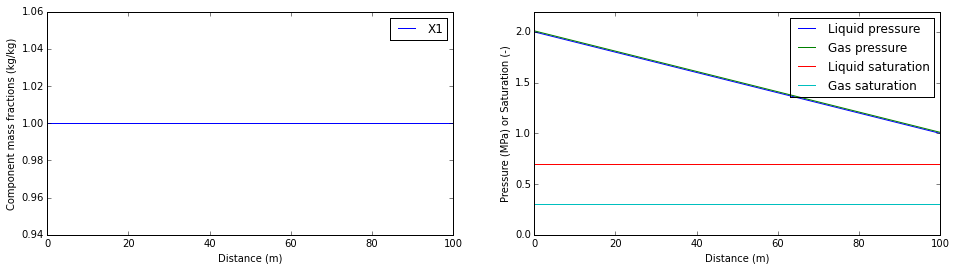

In [12]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of mass fraction component
axes[0].plot(moosedata1.x, moosedata1.x1, label = 'X1')
axes[0].set_ylabel('Component mass fractions (kg/kg)')
axes[0].set_xlabel('Distance (m)')
axes[0].legend(loc = 'upper right')
# Plot of pressure and saturation
axes[1].plot(moosedata1.x, moosedata1.liquid_pressure/1e6, label = 'Liquid pressure')
axes[1].plot(moosedata1.x, moosedata1.gas_pressure/1e6, label = 'Gas pressure')
axes[1].plot(moosedata1.x, moosedata1.liquid_saturation, label = 'Liquid saturation')
axes[1].plot(moosedata1.x, moosedata1.gas_saturation, label = 'Gas saturation')
axes[1].set_ylabel('Pressure (MPa) or Saturation (-)')
axes[1].set_xlabel('Distance (m)')
axes[1].set_ylim([0,2.2])
axes[1].legend()

These plots verify that the initial pressure, saturation and mass fraction are set correctly.

Plots of the density and viscosity of the liquid (water) and gas (CO2) at these conditions. Also shown are data for these values taken from the NIST webbook (http://webbook.nist.gov/chemistry/fluid/).

In [13]:
nistdatawater = pd.read_csv('gold/nist_data_water.csv', delimiter='\t', header = None)
nistdataco2 = pd.read_csv('gold/nist_data_co2.csv', delimiter='\t', header = None)

xdata = np.linspace(0,100,11)

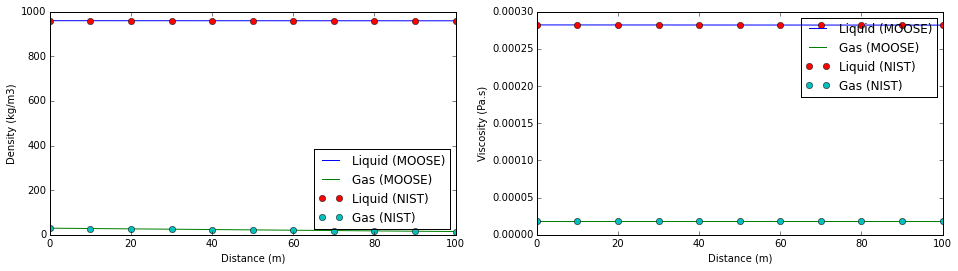

In [14]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of density
axes[0].plot(moosedata1.x, moosedata1.liquid_density, label = 'Liquid (MOOSE)')
axes[0].plot(moosedata1.x, moosedata1.gas_density, label = 'Gas (MOOSE)')
axes[0].plot(xdata, np.flipud(nistdatawater.icol(2)),'o', label='Liquid (NIST)')
axes[0].plot(xdata, np.flipud(nistdataco2.icol(2)),'o', label='Gas (NIST)')
axes[0].set_ylabel('Density (kg/m3)')
axes[0].set_xlabel('Distance (m)')
axes[0].legend(loc = 'best')
# Plot of viscosity
axes[1].plot(moosedata1.x, moosedata1.liquid_viscosity, label = 'Liquid (MOOSE)')
axes[1].plot(moosedata1.x, moosedata1.gas_viscosity, label = 'Gas (MOOSE)')
axes[1].plot(xdata, np.flipud(nistdatawater.icol(11)),'o', label='Liquid (NIST)')
axes[1].plot(xdata, np.flipud(nistdataco2.icol(11)),'o', label='Gas (NIST)')
axes[1].set_ylabel('Viscosity (Pa.s)')
axes[1].set_xlabel('Distance (m)')
axes[1].legend()

Plots of the derivative of density wrt saturation, pressure, and the two component mass fractions.

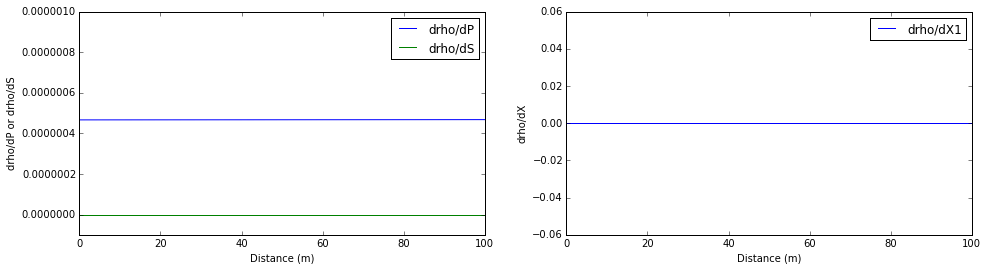

In [15]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of derivative of density wrt pressure and saturation
axes[0].plot(moosedata1.x, moosedata1.dliquiddensitydp, label = 'drho/dP')
axes[0].plot(moosedata1.x, moosedata1.dliquiddensityds, label = 'drho/dS')
axes[0].set_ylabel('drho/dP or drho/dS')
axes[0].set_xlabel('Distance (m)')
axes[0].set_ylim([-1.e-7, 1e-6])
axes[0].legend()
# Plot of derivative of density wrt x1
axes[1].plot(moosedata1.x, moosedata1.dliquiddensitydx1, label = 'drho/dX1')
axes[1].set_ylabel('drho/dX')
axes[1].set_xlabel('Distance (m)')
axes[1].legend()

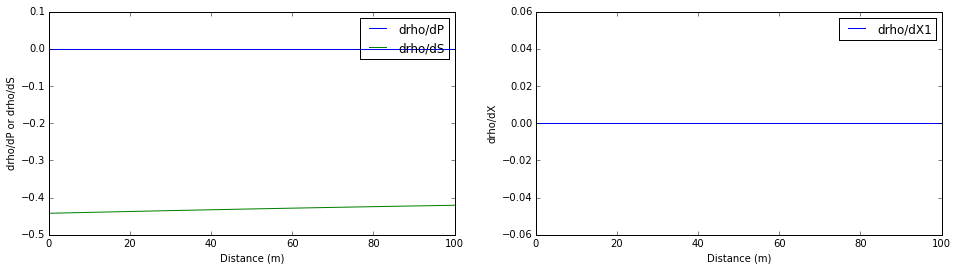

In [29]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of derivative of density wrt pressure and saturation
axes[0].plot(moosedata1.x, moosedata1.dgasdensitydp, label = 'drho/dP')
axes[0].plot(moosedata1.x, moosedata1.dgasdensityds, label = 'drho/dS')
axes[0].set_ylabel('drho/dP or drho/dS')
axes[0].set_xlabel('Distance (m)')
#axes[0].set_ylim([-1.e-7, 1e-6])
axes[0].legend()
# Plot of derivative of density wrt x1
axes[1].plot(moosedata1.x, moosedata1.dgasdensitydx1, label = 'drho/dX1')
axes[1].set_ylabel('drho/dX')
axes[1].set_xlabel('Distance (m)')
axes[1].legend()

Test the derivative of density wrt pressure and saturation. To assess the derivatives, we can numerically calculate $\partial \rho / \partial P = \left(\partial \rho / \partial x\right) / \left(\partial P / \partial x\right)$ using the values for $\rho$, and $P$ given by MOOSE.

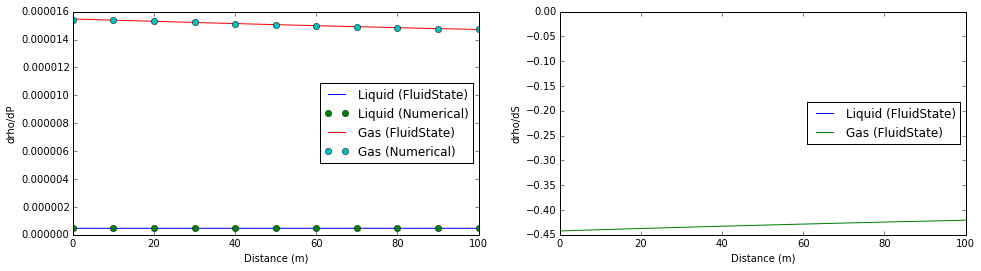

In [30]:
fig, axes = plt.subplots(1,2, figsize = (16,4))

# Plot of derivative of density wrt pressure
axes[0].plot(moosedata1.x, moosedata1.dliquiddensitydp, label = 'Liquid (FluidState)')
axes[0].plot(moosedata1.x,np.gradient(moosedata1.liquid_density, 10)/np.gradient(moosedata1.liquid_pressure, 10), 'o', label = 'Liquid (Numerical)')
axes[0].plot(moosedata1.x, moosedata1.dgasdensitydp, label = 'Gas (FluidState)')
axes[0].plot(moosedata1.x,np.gradient(moosedata1.gas_density, 10)/np.gradient(moosedata1.gas_pressure, 10), 'o', label = 'Gas (Numerical)')
axes[0].set_ylabel('drho/dP')
axes[0].set_xlabel('Distance (m)')
axes[0].legend(loc = 'center right')

# Plot of derivative of density wrt saturation
axes[1].plot(moosedata1.x, moosedata1.dliquiddensityds, label = 'Liquid (FluidState)')
#axes[1].plot(moosedata1.x,np.gradient(moosedata1.liquid_density, 10)/np.gradient(moosedata1.liquid_saturation, 10), 'o', label = 'Liquid (Numerical)')
axes[1].plot(moosedata1.x, moosedata1.dgasdensityds, label = 'Gas (FluidState)')
#axes[1].plot(moosedata1.x,np.gradient(moosedata1.gas_density, 10)/np.gradient(moosedata1.gas_saturation, 10), 'o', label = 'Gas (Numerical)')
axes[1].set_ylabel('drho/dS')
axes[1].set_xlabel('Distance (m)')
axes[1].legend(loc = 'center right')

We can see that the computed derivative given by the SinglePhase FluidState UserObject is correct (note that the numerically calculated derivative using np.gradient is slightly off at the boundaries).

The mobility $\lambda = k_r \rho / \mu$ given by the FluidState UserObject can also be compared to the results calculated using 
the given values for relative permeability, density and viscosity.

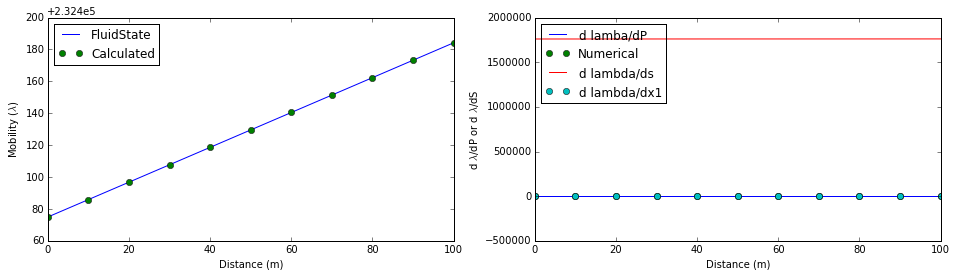

In [43]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of mobility
axes[0].plot(moosedata1.x, moosedata1.liquid_mobility, label = 'FluidState')
axes[0].plot(moosedata1.x, moosedata1.liquid_relperm * moosedata1.liquid_density/moosedata1.liquid_viscosity, 'o', label = 'Calculated')
axes[0].set_ylabel('Mobility ($\lambda$)')
axes[0].set_xlabel('Distance (m)')
axes[0].legend(loc = 'upper left')
# Plot of derivative of mobility wrt p and s
axes[1].plot(moosedata1.x, moosedata1.dliquidmobilitydp, label = 'd lamba/dP')
axes[1].plot(moosedata1.x, np.gradient(moosedata1.liquid_mobility, 10)/np.gradient(moosedata1.liquid_pressure, 10), 'o', label = 'Numerical')
axes[1].plot(moosedata1.x, moosedata1.dliquidmobilityds, label = 'd lambda/ds')
axes[1].plot(moosedata1.x, moosedata1.dliquidmobilitydx1, 'o',label = 'd lambda/dx1')
axes[1].set_ylabel('d $\lambda$/dP or d $\lambda$/dS')
axes[1].set_xlabel('Distance (m)')
axes[1].legend(loc = 'upper left')

Similarly for the gas phase

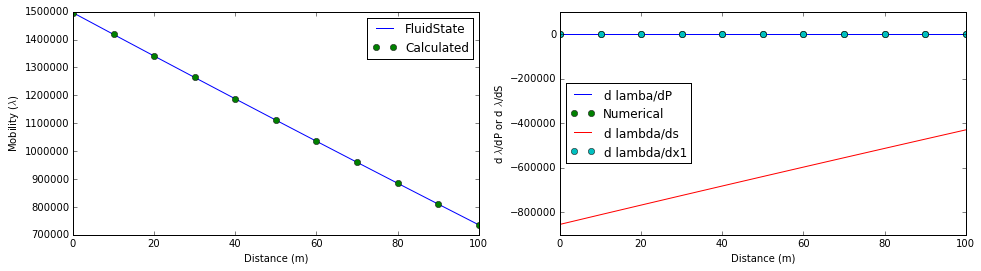

In [39]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of mobility
axes[0].plot(moosedata1.x, moosedata1.gasmobility, label = 'FluidState')
axes[0].plot(moosedata1.x, moosedata1.gas_relperm * moosedata1.gas_density/moosedata1.gas_viscosity, 'o', label = 'Calculated')
axes[0].set_ylabel('Mobility ($\lambda$)')
axes[0].set_xlabel('Distance (m)')
axes[0].legend(loc = 'upper right')
# Plot of derivative of mobility wrt p and s
axes[1].plot(moosedata1.x, moosedata1.dgasmobilitydp, label = 'd lamba/dP')
axes[1].plot(moosedata1.x, np.gradient(moosedata1.gasmobility, 10)/np.gradient(moosedata1.gas_pressure, 10), 'o', label = 'Numerical')
axes[1].plot(moosedata1.x, moosedata1.dgasmobilityds, label = 'd lambda/ds')
axes[1].plot(moosedata1.x, moosedata1.dgasmobilitydx1, 'o',label = 'd lambda/dx1')
axes[1].set_ylabel('d $\lambda$/dP or d $\lambda$/dS')
axes[1].set_xlabel('Distance (m)')
axes[1].legend(loc = 'best')

Plots of the Relative permeabiltiy and its derivative wrt saturation.

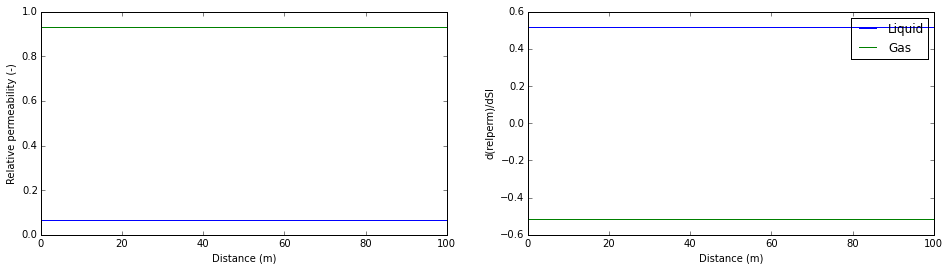

In [42]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Plot of relative permeability
axes[0].plot(moosedata1.x, moosedata1.liquid_relperm, label = 'Liquid')
axes[0].plot(moosedata1.x, moosedata1.gas_relperm, label = 'Gas')


axes[0].set_ylabel('Relative permeability (-)')
axes[0].set_xlabel('Distance (m)')
# Plot of derivative of relative permeability
axes[1].plot(moosedata1.x, moosedata1.dliquidrelperm, label = 'Liquid')
axes[1].plot(moosedata1.x, moosedata1.dgasrelperm, label = 'Gas')
axes[1].set_ylabel('d(relperm)/dSl')
axes[1].set_xlabel('Distance (m)')
axes[1].legend()